In [8]:
# Import packages and set visualization style
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Netflix data analysis

#### In this exercise, we are goining to use the skills we learnt in panads to analyse real data. This exercise is similar to real world data analysis tasks used as one of the main steps in data science projects

Netflix recently released some user ratings data. I wanted to ask a straightforward question: do Netflix subscribers prefer older or newer movies?

Intuitively, you want to split the dataset into groups, one for each year, and then to compute a summary statistic, such as the mean or the median, and then to see whether this statistic increases over the years (after this, you may want to perform a statistical test).

* ** Data Exploration with pandas**

In [5]:
# Import data and check out head of DataFrame
netflix_df = pd.read_csv('../Data/netflix.csv')
netflix_df.head()

,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


* **Summarising your data with plots and statistics**

In [6]:
# Check out info of DataFrame
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
title                1000 non-null object
rating               1000 non-null object
ratinglevel          941 non-null object
ratingdescription    1000 non-null int64
release_year         1000 non-null int64
user_rating_score    605 non-null float64
user_rating_size     1000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


* **Clean the data by dropping any NaN or duplicates**

In [7]:
# Drop rows with missing values and drop duplicate
netflix_df.dropna(inplace=True)
netflix_df.drop_duplicates(inplace=True)

* **build a pairplot of the DataFrame using seaborn in order to get a visual sense of the data. You'll color the data by the 'rating' column. Check out the plots and see what information you can get from them**



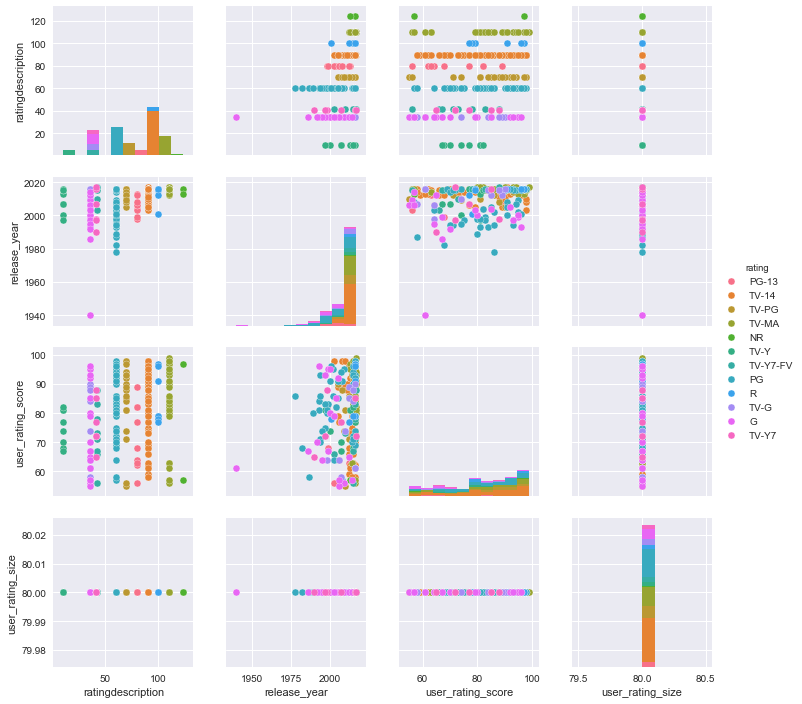

In [10]:
# Visualize pairplot of df
sns.pairplot(netflix_df, hue='rating');

* **There is not a visually identifiable trend but perhaps some data analysis will draw out any trends. Check out several summary statistics of the DataFrame**

In [11]:
netflix_df.describe()

,ratingdescription,release_year,user_rating_score,user_rating_size
count,246.000000,246.000000,246.000000,246.0
mean,73.556911,2010.272358,81.390244,80.0
std,26.616145,8.887219,12.677883,0.0
min,10.000000,1940.000000,55.000000,80.0
25%,60.000000,2007.000000,71.000000,80.0
50%,80.000000,2015.000000,83.500000,80.0
75%,90.000000,2016.000000,92.750000,80.0
max,124.000000,2017.000000,99.000000,80.0


* **split the data into groups, where each group is the set of movies released in a given year**

In [12]:
# Group by year
df_by_year = netflix_df.groupby('release_year')

* **Remember that the .describe() method for a DataFrame returns summary statistics for numeric columns? Well, the .describe() method for DataFrameGroupBy objects returns summary statistics for each numeric column, but computed for each group in the split.**

In [13]:
# Summary stats over years
df_by_year.describe().head()

ratingdescription                                          \
                         count  mean std   min   25%   50%   75%   max   
release_year                                                             
1940                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1978                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1982                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1986                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1987                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   

             user_rating_score        ...              user_rating_size        \
                         count  mean  ...    75%   max            count  mean   
release_year                          ...                                       
1940                       1.0  61.0  ...   61.0  61.0              1.0  80.0   
1978                       1.0  86.0  ...   86.0  86.0              1.0  80.0   
1982                       1.0  68.0  ...   68.0  68.0              1.0  80.0   
1986                       1.0  67.0  ...   67.0  67.0              1.0  80.0   
1987                       1.0  58.0  ...   58.0  58.0              1.0  80.0   

                                                
             std   min   25%   50%   75%   max  
release_year                                    
1940         NaN  80.0  80.0  80.0  80.0  80.0  
1978         NaN  80.0  80.0  80.0  80.0  80.0  
1982         NaN  80.0  80.0  80.0  80.0  80.0  
1986         NaN  80.0  80.0  80.0  80.0  80.0  
1987         NaN  80.0  80.0  80.0  80.0  80.0  

[5 rows x 24 columns]

* **Let's say that you wanted the mean or median user_rating_score for each year. Then you can apply the .mean() or .median() method, respectively, to the groupby object and 'combine' these into a new DataFrame.**

In [15]:
# Get median values by year and print first 5 rows
df_med_by_year = df_by_year.median()
df_med_by_year.head()

,ratingdescription,user_rating_score,user_rating_size
release_year,,,
1940,35.0,61.0,80.0
1978,60.0,86.0,80.0
1982,60.0,68.0,80.0
1986,35.0,67.0,80.0
1987,60.0,58.0,80.0


* **You're interested in the user_rating_score column, which contains the median rating for each year. You can slice out the user_rating_score column of df_med_by_year and plot it as a function of the year (given by the index of the DataFrame df_rat_by_year):**

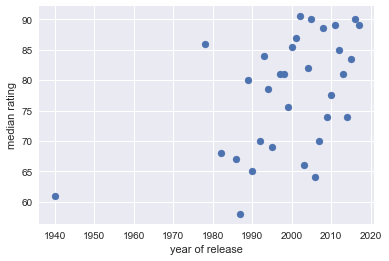

In [16]:
# Slice out user rating and plot
df_rat_by_year = df_med_by_year['user_rating_score']
plt.scatter(df_rat_by_year.index, df_rat_by_year)
plt.xlabel('year of release')
plt.ylabel('median rating');


### Netflix Analytics - Movie Recommendation through Correlations

#### As now you ahve experienece how to work with real data and to plot the user ratings over the years. Now let's use more of Netflix data and more mahematical models to create a recommender system based on user's rating for movies. 

This project aims to build a movie recommendation mechanism within Netflix. The dataset I used here come directly from Netflix. It consists of 4 text data files, each file contains over 20M rows, i.e. over 4K movies and 400K customers. All together over 17K movies and 500K+ customers!

**Objective**

Learn from data and recommend best TV shows to users, based on self & others behaviour 

**Data manipulation**

**Data loading**
Each data file (there are 4 of them) contains below columns:
* Movie ID (as first line of each new movie record / file)
* Customer ID
* Rating (1 to 5)
* Date they gave the ratings

There is another file contains the mapping of Movie ID to the movie background like name, year of release, etc

In [18]:
import pandas as pd
import numpy as np
import math
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Reader, Dataset, SVD, evaluate
sns.set_style("darkgrid")

In [23]:
#Next let's load first data file:
# Skip date and limit number or rows to 50,000 records

customer_rating_df1 = pd.read_csv('../Data/Netflix_prize/combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1], nrows=50000)

customer_rating_df1['Rating'] = customer_rating_df1['Rating'].astype(float)

print('Dataset 1 shape: {}'.format(customer_rating_df1.shape))


Dataset 1 shape: (50000, 2)


In [24]:
#Next let's load first data file:
# Skip date and limit number or rows to 50,000 records

customer_rating_df2 = pd.read_csv('../Data/Netflix_prize/combined_data_2.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1], nrows=50000)

customer_rating_df2['Rating'] = customer_rating_df2['Rating'].astype(float)

print('Dataset 2 shape: {}'.format(customer_rating_df2.shape))


Dataset 2 shape: (50000, 2)


In [25]:
#Next let's load first data file:
# Skip date and limit number or rows to 50,000 records

customer_rating_df3 = pd.read_csv('../Data/Netflix_prize/combined_data_3.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1], nrows=50000)

customer_rating_df3['Rating'] = customer_rating_df3['Rating'].astype(float)

print('Dataset 3 shape: {}'.format(customer_rating_df3.shape))


Dataset 3 shape: (50000, 2)


In [26]:
#Next let's load first data file:
# Skip date and limit number or rows to 50,000 records

customer_rating_df4 = pd.read_csv('../Data/Netflix_prize/combined_data_4.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1], nrows=50000)

customer_rating_df4['Rating'] = customer_rating_df4['Rating'].astype(float)

print('Dataset 4 shape: {}'.format(customer_rating_df4.shape))


Dataset 4 shape: (50000, 2)


In [28]:
#combine datasets into one dataframe
# load less data for speed

customer_rating_df = customer_rating_df1
customer_rating_df = customer_rating_df.append(customer_rating_df2)
customer_rating_df = customer_rating_df.append(customer_rating_df3)
customer_rating_df = customer_rating_df.append(customer_rating_df4)

customer_rating_df.index = np.arange(0,len(customer_rating_df))
print('Full dataset shape: {}'.format(customer_rating_df.shape))


Full dataset shape: (200000, 2)


### Data preprocessing

In [42]:
ratings = customer_rating_df.groupby('Rating')['Rating'].agg(['count'])

# get movie count
# the sum of null ratings (the count of movies)
movie_count = customer_rating_df.isnull().sum()[1]
print("movie count", movie_count)

# get customer count
# nunique() Return number of unique elements in the object. 
cust_count = customer_rating_df['Cust_Id'].nunique() - movie_count
print("customer count", cust_count)

# get rating count
rating_count = customer_rating_df['Cust_Id'].count() - movie_count
print("rating count", rating_count)

movie count 78
customer count 114693
rating count 199922


**Data viewing**

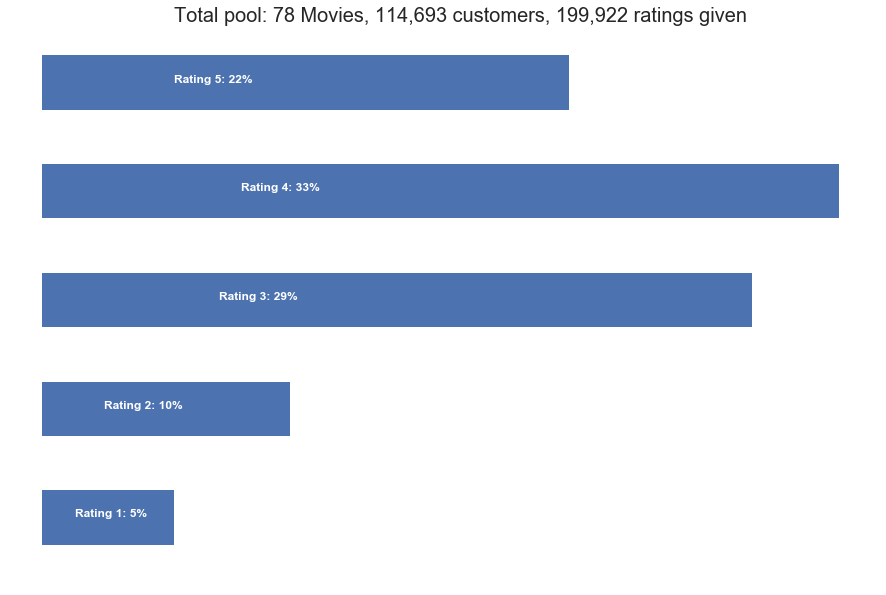

In [47]:
#plot the rattings
ax = ratings.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(ratings.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, ratings.iloc[i-1][0]*100 / ratings.sum()[0]), color = 'white', weight = 'bold')

We can see that the rating tends to be relatively positive (>3). This may be due to the fact that unhappy customers tend to just leave instead of making efforts to rate. We can keep this in mind - low rating movies mean they are generally really bad

**Data cleaning**

Movie ID is really a mess import! Looping through dataframe to add Movie ID column WILL make the Kernel run out of memory as it is too inefficient. One effeicent way to do it is first creating a numpy array with correct length then add the whole array as column into the main dataframe! This part is done for you.

In [52]:
df_nan = pd.DataFrame(pd.isnull(customer_rating_df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(customer_rating_df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))


Movie numpy: [ 1.  1.  1. ... 78. 78. 78.]
Length: 199922


In [67]:
# remove those Movie ID rows
customer_rating_df = customer_rating_df[pd.notnull(customer_rating_df['Rating'])]

customer_rating_df['Movie_Id'] = movie_np.astype(int)
customer_rating_df['Cust_Id'] = customer_rating_df['Cust_Id'].astype(int)
print('-Dataset examples-')
print(customer_rating_df.iloc[::10000, :])

-Dataset examples-
        Cust_Id  Rating  Movie_Id
1       1488844     3.0         1
10008   2421394     3.0         8
20008   1834737     3.0         8
30017   1572097     4.0        17
40018   2304974     3.0        18
50027    973538     2.0        27
60033    416643     3.0        33
70033   2214502     3.0        33
80033    505449     4.0        33
90034   2157611     4.0        34
100040  1559022     3.0        40
110046  2089647     2.0        46
120053   745542     4.0        53
130057   765129     4.0        57
140058  1928222     4.0        58
150062   274313     2.0        62
160072  1601449     4.0        72
170072   528530     2.0        72
180076    24294     4.0        76
190077  2629765     3.0        77


The data set now is super huge. Therefore let's' try to reduce the data volumn by improving the data quality below:

* Remove movie with too less reviews (they are relatively not popular)
* Remove customer who give too less reviews (they are relatively less active)

Having above benchmark will have significant improvement on efficiency, since those unpopular movies and non-active customers still occupy same volumn as those popular movies and active customers in the view of matrix (NaN still occupy space). This should help improve the statistical signifiance too.



In [69]:
f = ['count','mean']

df_movie_summary = customer_rating_df.groupby('Movie_Id')['Rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.8),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

df_cust_summary = customer_rating_df.groupby('Cust_Id')['Rating'].agg(f)
df_cust_summary.index = df_cust_summary.index.map(int)
cust_benchmark = round(df_cust_summary['count'].quantile(0.8),0)
drop_cust_list = df_cust_summary[df_cust_summary['count'] < cust_benchmark].index

print('Customer minimum times of review: {}'.format(cust_benchmark))

Movie minimum times of review: 3153.0
Customer minimum times of review: 2.0


** Now, it's your turn**

Trim down our data, whats the difference in data size?

In [70]:
print('Original Shape: {}'.format(customer_rating_df.shape))
customer_rating_df = customer_rating_df[~customer_rating_df['Movie_Id'].isin(drop_movie_list)]
customer_rating_df = customer_rating_df[~customer_rating_df['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(customer_rating_df.shape))

Original Shape: (199922, 3)
After Trim Shape: (95760, 3)


In [72]:
# Let's pivot the data set and put it into a giant matrix - we need it for our recommendation system:

df_p = pd.pivot_table(customer_rating_df,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(40477, 16)


**Data mapping**

In [73]:
df_title = pd.read_csv('../Data/Netflix_prize//movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])
df_title.set_index('Movie_Id', inplace = True)
print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


**Recommendation models**

In [74]:
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(customer_rating_df[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)
data.split(n_folds=3)

svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 1.0124
MAE:  0.8095
------------
Fold 2
RMSE: 1.0105
MAE:  0.8093
------------
Fold 3
RMSE: 1.0157
MAE:  0.8078
------------
------------
Mean RMSE: 1.0129
Mean MAE : 0.8089
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.8095439126043187,
                             0.8093167112122956,
                             0.8078125044731297],
                            'rmse': [1.0124046655780436,
                             1.0104930456897556,
                             1.0156743744939989]})

In [76]:
customer_rating_df.groupby('Cust_Id').count()

,Rating,Movie_Id
Cust_Id,,
6,3,3
7,5,5
59,1,1
97,2,2
199,2,2
307,2,2
684,2,2
769,6,6
1086,2,2


Below is what user 783514 liked in the past:

In [78]:
df_7 = customer_rating_df[(customer_rating_df['Cust_Id'] == 7) & (customer_rating_df['Rating'] == 5)]
df_7 = df_7.set_index('Movie_Id')
df_7 = df_7.join(df_title)['Name']
print(df_7)

Movie_Id
8                            What the #$*! Do We Know!?
34    Ashtanga Yoga: Beginner's Practice with Nicki ...
46                       Rudolph the Red-Nosed Reindeer
77                                                Congo
Name: Name, dtype: object


Let's predict which movies user 7 would love to watch:

In [84]:
user_7 = df_title.copy()
user_7 = user_7.reset_index()
user_7 = user_7[~user_7['Movie_Id'].isin(drop_movie_list)]

# getting full dataset
data = Dataset.load_from_df(customer_rating_df[['Cust_Id', 'Movie_Id', 'Rating']], reader)

trainset = data.build_full_trainset()
svd.train(trainset)

user_7['Estimate_Score'] = user_7['Movie_Id'].apply(lambda x: svd.predict(7, x).est)

user_7 = user_7.drop('Movie_Id', axis = 1)

user_7 = user_7.sort_values('Estimate_Score', ascending=False)
print(user_7.head(10))


/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/surprise/prediction_algorithms/algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


      Year                                               Name  Estimate_Score
76  1995.0                                              Congo        4.836245
71  1974.0                            At Home Among Strangers        4.494591
7   2004.0                         What the #$*! Do We Know!?        4.493788
17  1994.0                                   Immortal Beloved        4.392679
32  2000.0                     Aqua Teen Hunger Force: Vol. 1        4.271173
52  2003.0                                     The Bonesetter        4.269841
45  1964.0                     Rudolph the Red-Nosed Reindeer        4.230100
77  1996.0                                 Jingle All the Way        4.208415
56  1995.0                                        Richard III        4.016223
33  2003.0  Ashtanga Yoga: Beginner's Practice with Nicki ...        3.967219


**Recommend with Pearsons' R correlations**

The way it works is we use Pearsons' R correlation to measure the linear correlation between review scores of all pairs of movies, then we provide the top 10 movies with highest correlations:

In [85]:
def recommend(movie_title, min_count):
    print("For movie ({})".format(movie_title))
    print("- Top 10 movies recommended based on Pearsons'R correlation - ")
    i = int(df_title.index[df_title['Name'] == movie_title][0])
    target = df_p[i]
    similar_to_target = df_p.corrwith(target)
    corr_target = pd.DataFrame(similar_to_target, columns = ['PearsonR'])
    corr_target.dropna(inplace = True)
    corr_target = corr_target.sort_values('PearsonR', ascending = False)
    corr_target.index = corr_target.index.map(int)
    corr_target = corr_target.join(df_title).join(df_movie_summary)[['PearsonR', 'Name', 'count', 'mean']]
    print(corr_target[corr_target['count']>min_count][:10].to_string(index=False))


In [86]:
recommend("What the #$*! Do We Know!?", 0)

For movie (What the #$*! Do We Know!?)
- Top 10 movies recommended based on Pearsons'R correlation - 
PearsonR                             Name  count      mean
                                                          
1.000000       What the #$*! Do We Know!?  14910  3.189805
0.226197                    The Libertine   3747  3.316520
0.187773                 Immortal Beloved  10722  3.784369
0.179314  Ferngully 2: The Magical Rescue   5939  3.731436
0.175377   Rudolph the Red-Nosed Reindeer   8808  3.525545
0.165644                      Richard III   3895  3.670347
0.164518                            Congo   7602  3.599053
0.162556                  Never Die Alone   3585  2.795816
0.156146                   The Bonesetter   9982  3.572430
0.149032                      Dragonheart  10663  3.517584


In [88]:
recommend("Congo", 0)

For movie (Congo)
- Top 10 movies recommended based on Pearsons'R correlation - 
PearsonR                                               Name  count      mean
                                                                            
1.000000                                              Congo   7602  3.599053
0.355810                                     The Bonesetter   9982  3.572430
0.302572                     Rudolph the Red-Nosed Reindeer   8808  3.525545
0.294353  Ashtanga Yoga: Beginner's Practice with Nicki ...   3445  3.546299
0.281328                                   Immortal Beloved  10722  3.784369
0.280297                                    Never Die Alone   3585  2.795816
0.274906                                      The Libertine   3747  3.316520
0.264366                            At Home Among Strangers  16553  3.898387
0.261330                                 Jingle All the Way   6396  3.707630
0.251961                    Ferngully 2: The Magical Rescue   5939  3.73